Vorschau der Affiliations:
0        Stevens Institute of Technology, Hoboken, USA
1                                                  NaN
2    Empirical Software Engineering Laboratory ECE,...
3    Department of Electrical & Computer Engineerin...
4    School of Electronics Engineering & Computer S...
Name: Author Affiliations, dtype: object
Extrahierte Universitäten aus Beispiel:
['Empirical Software Engineering Laboratory ECE, University of Texas, Austin, USA', 'Institute of Technology']

Top 10 Universitäten mit den meisten Publikationen:
                                          University  Publication Count
0                            Institute of Technology                132
1                                            College                 59
2  Software Engineering Institute, Carnegie Mello...                 16
3                                         University                 13
4                         Carnegie Mellon University                 13
5                    

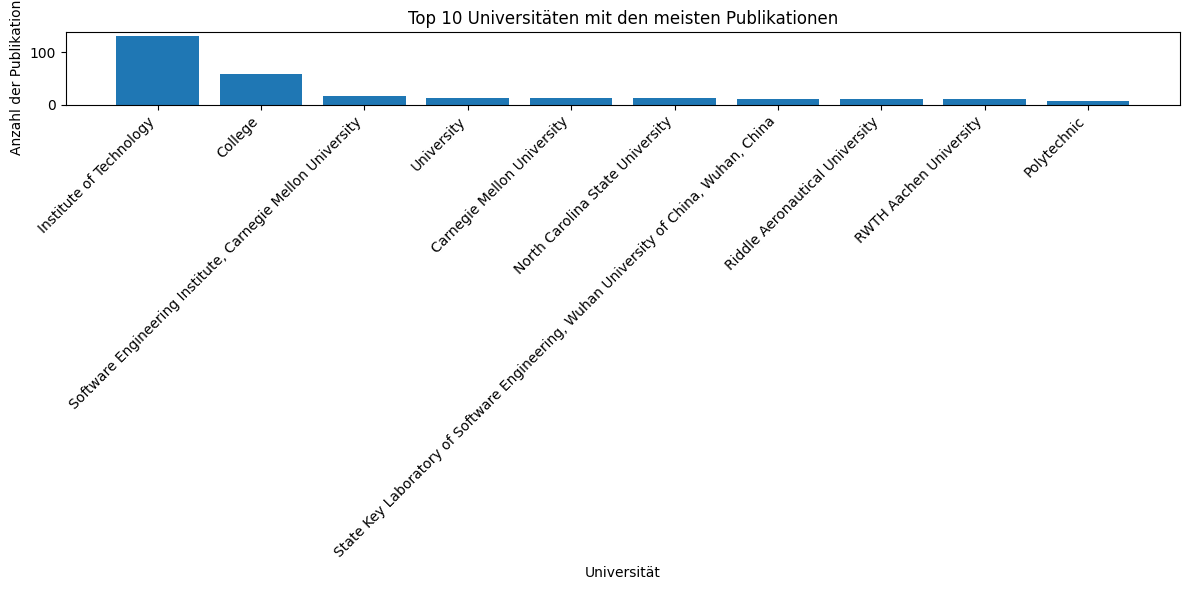

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import re

# Den Pfad zur CSV-Datei definieren (angenommen, sie liegt im 'data'-Ordner deines Projekts)
csv_file_path = os.path.join(os.getcwd(), '..', 'Data', 'test_dataset.csv')

# CSV-Datei einlesen
df = pd.read_csv(csv_file_path)

# Zeige eine Vorschau der Affiliations
print("Vorschau der Affiliations:")
print(df["Author Affiliations"].head())

# Funktion zur verbesserten Extraktion von Universitäten
def extract_universities_from_affiliation(affiliation):
    # Regex, um Universitäten mit Kontext zu erfassen
    pattern = r"\b(?:[A-Za-z\s,]*University|Institute of Technology|Polytechnic|College|Academy)\b(?:\s*of\s*[A-Za-z\s,]*)?"
    matches = re.findall(pattern, affiliation, re.IGNORECASE)
    return [match.strip() for match in matches if match.strip()]

# Test der Funktion mit einem Beispiel
example_affiliation = "Empirical Software Engineering Laboratory ECE, University of Texas, Austin, USA; Department of Electrical & Computer Engineering, Stevens Institute of Technology, Hoboken, USA"
print("Extrahierte Universitäten aus Beispiel:")
print(extract_universities_from_affiliation(example_affiliation))

# Entferne NaN-Werte aus der Spalte "Author Affiliations"
affiliations = df["Author Affiliations"].dropna()

# Alle Universitätsnamen extrahieren
university_list = []
for aff in affiliations:
    matches = extract_universities_from_affiliation(aff)
    if matches:
        university_list.extend(matches)

# Zähle die Häufigkeiten der Universitäten
university_counts = Counter(university_list)

# Top 10 Universitäten nach Anzahl der Publikationen
top_10_universities = university_counts.most_common(10)

# In ein DataFrame umwandeln für die Visualisierung
top_10_df = pd.DataFrame(top_10_universities, columns=["University", "Publication Count"])

# Ergebnisse ausgeben
print("\nTop 10 Universitäten mit den meisten Publikationen:")
print(top_10_df)

# Ergebnisse visualisieren
plt.figure(figsize=(12, 6))
plt.bar(top_10_df["University"], top_10_df["Publication Count"])
plt.title("Top 10 Universitäten mit den meisten Publikationen")
plt.xlabel("Universität")
plt.ylabel("Anzahl der Publikationen")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
